In this activity, we will be using machine learning to classify galaxies into three types (ellipticals, spirals or galactic mergers) based on their observed properties.

Earlier in the week, you had a go at classifying galaxies by hand on the Galaxy Zoo website which hopefully gave you some intuition for the dataset and how we can distinguish between the different types of galaxy.

For our machine learning experiments, we are using the crowd-classified classes from Galaxy Zoo as the training data for our automatic decision tree classifier.


Data can be downloaded [here](https://groklearning-cdn.com/modules/jSAg5N3xrpKtvpDtCtMTGV/galaxy_catalogue.npy).

## Task i - Splitting the train and test sets

To start, we need to split the data into training and testing sets.

Your task is to implement the ```splitdata_train_test``` function. It takes a NumPy array and splits it into a training and testing NumPy array based on the specified training fraction. The function takes two arguments and should return two values:

<b>Arguments</b>


*   ```data```: the NumPy array containing the galaxies in the form described in the previous slide;
*   ```fraction_training```: the fraction of the data to use for training. This will be a float between 0 and 1.

The number of training rows should be truncated if necessary. For example, with a fraction of 0.67 and our 780 galaxies, the number of training rows is ```780*0.67 = 722.6```, which should be truncated to ```722``` using ```int```. The remaining rows should be used for testing.

<b>Return values</b>



*   training_set: the first value is a NumPy array training set;
*   testing_set: the second value is a NumPy array testing set



<b>Good practice: randomize the dataset order</b>
<br>You shouldn't assume that the data has already been shuffled. If you look at ```data['class']``` you will see that the ```merger, elliptical``` and ```spiral``` examples appear together. You can use:

In [ ]:
np.random.seed(0)
np.random.shuffle(data)

The first statement ensures the shuffle is the same for each experiment, so you get consistent results.
<br>The second shuffles the rows of the data array in place.

In [ ]:
import numpy as np

#load data
gal_data = np.load('galaxy_catalogue.npy')

for name, value in zip(gal_data.dtype.names, gal_data[0]):
  print('{:10} {:.6}'.format(name, value))

u-g        1.85765
g-r        0.67158
r-i        0.4231
i-z        0.3061
ecc        0.585428
m4_u       2.25195
m4_g       2.33985
m4_r       2.38065
m4_i       2.35974
m4_z       2.39553
petroR50_u 3.09512
petroR50_r 3.81892
petroR50_z 3.82623
petroR90_u 5.17481
petroR90_r 8.26301
petroR90_z 11.4773
class      merger


In [58]:
# accessing first 10 value of column
gal_data['u-g'][:10]

array([1.85765, 1.74259, 2.10697, 1.2284 , 1.80792, 2.03214, 2.35909,
       1.51422, 1.56721, 1.7118 ])

In [ ]:
len(gal_data), len(gal_data)*0.7, len(gal_data)*0.3

(780, 546.0, 234.0)

In [ ]:
# write splitdata_train_test function taking two arguments, returning two values

def splitdata_train_test(data, fraction_training):
  #shuffle the data
  np.random.shuffle(data)

  #identify the split point
  split_point = int(len(data) * fraction_training)
  training = data[:split_point]
  testing = data[split_point:]
  return training, testing

In [ ]:
fraction_training = 0.7

# split the data using the above function
training, testing = splitdata_train_test(gal_data, fraction_training)

In [ ]:
print('Number data galaxies:', len(gal_data))
print('Train fraction:', fraction_training)
print('Number of galaxies in training set:', len(training))
print('Number of galaxies in testing set:', len(testing))

Number data galaxies: 780
Train fraction: 0.7
Number of galaxies in training set: 546
Number of galaxies in testing set: 234




---



## Task ii - Generating features and targets

Next, we generate features and targets for the decision tree.

Use the ```generate_features_targets``` from previous activity, however, you need to calculate the concentration values for the ```u, r``` and ```z``` filters.

Your task is to add in the concentration calculation for each filter from the 50% and 90% Petrosian radius measurements:

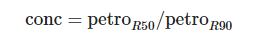

As described earlier, data has the following fields:

*   <b>colours:</b> <font color="green">```u-g, g-r, r-i, and i-z;```</font>
*   <b>eccentricity:</b> <font color="green">```ecc```</font> A circle has an eccentricity of zero, so the eccentricity shows you how "un-circular" the curve is. Bigger eccentricities are less curved
*   <b>4th adaptive moments:</b> <font color="green">```m4_u, m4_g, m4_r, m4_i, and m4_z;```</font>
*  <b>50% Petrosian:</b> <font color="green">```petroR50_u, petroR50_r, petroR50_z;```</font>
*  <b>90% Petrosian:</b> <font color="green">```petroR90_u, petroR90_r, petroR90_z.```</font>
<br></br>Concentration is similar to the luminosity profile of the galaxy, which measures what proportion of a galaxy's total light is emitted within what radius. A simplified way to represent this is to take the ratio of the radii containing 50% and 90% of the Petrosian flux.


In [ ]:
# build from the previous week, add in calculated concentrations
def generate_features_targets(data):

  # identify the targets
  targets = data['class']

  # identifying features
  # start with creating array of 780 rows, 13 columns
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']

  # fill the remaining 3 columns with concentrations in the u, r and z filters
  # concentration in u filter
  features[:, 10] = data['petroR50_u']/ data['petroR90_u']
  # concentration in r filter
  features[:, 11] = data['petroR50_r']/ data['petroR90_r']
  # concentration in z filter
  features[:, 12] = data['petroR50_z']/ data['petroR90_z']

  return features, targets

In [ ]:
features, targets = generate_features_targets(gal_data)

In [ ]:
# Print the shape of each array to check the arrays are the correct dimensions.
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features shape: (780, 13)
Targets shape: (780,)


### Learnings:

*   How to create an empty array - ```np.empty(x)```
>> -Return a new array of given shape and type, without initializing entries. Unlike ```np.zeros``` which will fill array with 0.
>> <br>-It is typically used for large arrays when performance is critical, and the values will be filled in later.
>> <br>-*numpy.empty(shape, dtype=float, order='C', *, like=None)*
>> <br>-For example s = (2, 2) >> np.zeros(s) will create array ([[ , ], [ , ]])
>> <br>https://numpy.org/doc/stable/reference/generated/numpy.empty.html



---



## Task iii - Train the decision tree classifier

It is time to use the functions we wrote to split the data and generate the features, and then train a decision tree classifier.

Your task is complete the <font color="red">```dtc_predict_actual```</font> function. The purpose of the function is to perform a held out validation and return the predicted and actual classes for later comparison.

The function takes a single argument which is the full data set and should return two NumPy arrays containing the predicted and actual classes respectively.

You will also need to copy your solutions from the previous two questions into the spaces allocated.

In [ ]:
# import libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# copy your splitdata_train_test function here
def splitdata_train_test(data, fraction_training):

  #shuffle the data
  np.random.shuffle(data)

  #identity the split point
  split_point = int(len(data) * fraction_training)
  training = data[:split_point]
  testing = data[split_point:]
  return training, testing

# copy your generate_features_targets function here
def generate_features_targets(data):
  # complete the function by calculating the concentrations

  # identify the targets
  targets = data['class']

  # identifying features
  # start with creating array of 780 rows, 13 columns
  features = np.empty(shape=(len(data), 13))
  features[:, 0] = data['u-g']
  features[:, 1] = data['g-r']
  features[:, 2] = data['r-i']
  features[:, 3] = data['i-z']
  features[:, 4] = data['ecc']
  features[:, 5] = data['m4_u']
  features[:, 6] = data['m4_g']
  features[:, 7] = data['m4_r']
  features[:, 8] = data['m4_i']
  features[:, 9] = data['m4_z']
  features[:, 10] = data['petroR50_u']/ data['petroR90_u']
  features[:, 11] = data['petroR50_r']/ data['petroR90_r']
  features[:, 12] = data['petroR50_z']/ data['petroR90_z']
  return features, targets


# complete this function by splitting the data set and training a decision tree classifier
def dtc_predict_actual(data):
  # split the data into training and testing sets using a training fraction of 0.7
  fraction_training = 0.7
  training, testing = splitdata_train_test(data, fraction_training)

  # generate the feature and targets for the training and test sets
  # i.e. train_features, train_targets, test_features, test_targets
  train_features, train_targets = generate_features_targets(training)
  test_features, test_targets = generate_features_targets(testing)
  actual_class = test_targets


  # instantiate a decision tree classifier
  dtc = DecisionTreeClassifier()

  # train the classifier with the train_features and train_targets
  dtc.fit(train_features, train_targets)

  # get predictions for the test_features
  predicted_class = dtc.predict(test_features)

  # return the predictions and the test_targets
  return predicted_class, actual_class

In [ ]:
predicted_class, actual_class = dtc_predict_actual(gal_data)

In [ ]:
print("Some initial results...\n   predicted,  actual")
for i in range(10):
  print("{}. {}, {}".format(i, predicted_class[i], actual_class[i]))

Some initial results...
   predicted,  actual
0. merger, merger
1. elliptical, elliptical
2. spiral, spiral
3. elliptical, merger
4. elliptical, elliptical
5. merger, elliptical
6. elliptical, elliptical
7. spiral, merger
8. elliptical, merger
9. elliptical, elliptical




---



## Task iv - Accuracy in classification

Your task is to complete the calculate_accuracy function. The function should calculate the accuracy: the fraction of predictions that are correct (i.e. the model score):

```accuracy = # correct predictions / # predictions```

The function takes two arguments;

* <b>predicted</b>: an array of the predicted class for each galaxy.
* <b>actual</b>: an array of the actual class for each galaxy.

<p>The return value should be a float (between 0 and 1).

In [ ]:
# libraries
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix


def calculate_accuracy(predicted, actual):
  accuracy = sum(predicted == actual) /  len(actual)
  return accuracy

Our accuracy score: 0.7858974358974359


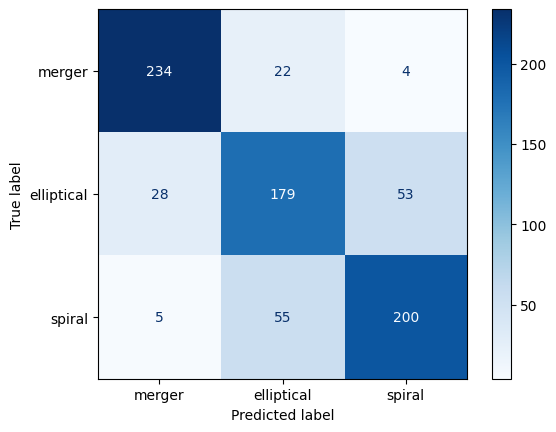

In [ ]:
gal_data = np.load('galaxy_catalogue.npy')

# split the data
features, targets = generate_features_targets(gal_data)

# train the model to get predicted and actual classes
dtc = DecisionTreeClassifier()
predicted = cross_val_predict(dtc, features, targets, cv=10)

# calculate the model score using your function
model_score = calculate_accuracy(predicted, targets)
print("Our accuracy score:", model_score)

# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels = list(set(targets))
model_cm = confusion_matrix(y_true=targets, y_pred=predicted)

# Plot the confusion matrix
metr = ConfusionMatrixDisplay(model_cm, display_labels=class_labels)
metr.plot(cmap=plt.cm.Blues)
plt.show()



---



## Task - Week 6a.v Random forest

Your task here is to complete the ```rf_predict_actual``` function. It returns the predicted and actual classes for our galaxies using a <b>random forest 10-fold with cross validation</b>.

You should use the RandomForestClassifier class from the ```sklearn.ensemble``` module. It can be instantiated with:

In [ ]:
rfc = RandomForestClassifier(n_estimators=n_estimators)

```n_estimators``` is the the number of decision trees in the forest.

```rf_predict_actual``` takes two arguments: the <b>data</b> used throughout this activity and the <b>number of estimators (n_estimators)</b> to be used in the random forest.

The function should return two NumPy arrays containing the predicted and actual classes respectively.

You can copy and paste the functions from previous questions. However, we have provided the ```generate_features_targets``` function in the support library.

Use the ```cross_val_predict``` function from the ```model_selection``` module as we did in the last question.

You can read its documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html). This approach allows us to get a prediction for every galaxy in the data set through cross validation. It also means that we don't need to manage the training and test sets.

In [ ]:
# complete this function to get predictions from a random forest classifier
def rf_predict_actual(data, n_estimators):
  # generate the features and targets
  features, targets = generate_features_targets(data)
  actual_class = np.array(targets)

  # instantiate a random forest classifier using n estimators
  rfc = RandomForestClassifier(n_estimators=n_estimators)

  # get predictions using 10-fold cross validation with cross_val_predict
  predict = cross_val_predict(rfc, features, targets, cv=10)
  predictions = np.array(predict)

  # return the predictions and their actual classes
  return predictions, actual_class

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

gal_data = np.load('galaxy_catalogue.npy')

In [ ]:
# get the predicted and actual classes
number_estimators = 200              # Number of trees
predicted_rf, actual_rf = rf_predict_actual(gal_data, number_estimators)

In [ ]:
# calculate the model score using your function
accuracy_rf = calculate_accuracy(predicted_rf, actual_rf)
print("Accuracy score:", accuracy_rf)

Accuracy score: 0.8705128205128205


In [ ]:
# calculate the models confusion matrix using sklearns confusion_matrix function
class_labels_rf = list(set(actual_rf))
model_cm_rf = confusion_matrix(y_true=actual_rf, y_pred=predicted_rf)

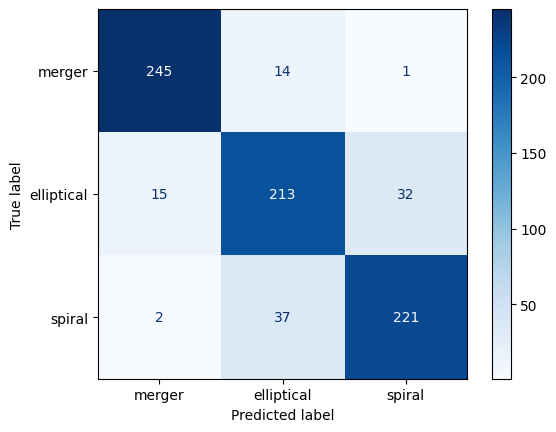

In [ ]:
# plot the confusion matrix using the provided functions.
# plt.figure()
# plot_confusion_matrix(model_cm_rf, classes=class_labels, normalize=False)
# plt.show()

metr_rf = ConfusionMatrixDisplay(model_cm_rf, display_labels=class_labels_rf)
metr_rf.plot(cmap=plt.cm.Blues)
plt.show()